In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [95]:
data = pd.read_csv('./data/salary2.csv')
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


# 분석목적: 학력, 교육연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용한 연봉 예측
- 연봉이 5만달러 이상인지 아닌지

### 컬럼 설명
* age: 나이
* workclass: 고용형태
* education: 학력
* education-num: 교육연수
* marital-status: 혼인상태
* occupation: 직업
* relationship: 가족관계
* race: 인종
* sex: 성별
* capital-gain: 자산증가
* capital-loss: 자산감소
* hours-per-week: 주당 노동 시간
* native-country: 본국
* class: 연봉구분 - target(분석대상)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [97]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# 결측치 탐색

In [98]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [99]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [100]:
# 결측치가 있는데 제거하는 경우는 타겟변수와의 관계를 확인하고 제거해도 되는지 고려하기
data['class'].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [101]:
data[data['workclass'].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [102]:
data[data['occupation'].isna()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [10]:
# workclass와 occupation의 결측치가 같이 존재하는 경우가 많음
data[(data['workclass'].isna()) & (data['occupation'].isna()) & (data['class'] == " >50K")]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
89,41,NaN,Masters,14,Married-civ-spouse,NaN,Wife,White,Female,7688,0,10,United-States,>50K
182,28,NaN,HS-grad,9,Married-civ-spouse,NaN,Own-child,White,Female,0,0,38,United-States,>50K
274,53,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,>50K
505,38,NaN,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,1887,10,United-States,>50K
781,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,5178,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48278,60,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,12,United-States,>50K
48279,52,NaN,12th,8,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,>50K
48297,62,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>50K
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K


In [103]:
265 / 11682 * 100

2.268447183701421

In [104]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [105]:
data.dropna()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [106]:
45222 / len(data) * 100

92.58834609557348

# 결측값의 비율이 약 7.5%이고, 삭제 시 데이터 분포에 편향을 주지 않으므로 삭제 

In [107]:
data = data.dropna()
data = data.reset_index(drop=True)
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
45218,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
45219,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
45220,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [108]:
# 공백과 같은 것을 고려
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [109]:
# class를 숫자로 변환
data['class'] = data['class'].apply(lambda x: 1 if x == ' >50K' else 0)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


# 이상치 탐색
- 이상값이 없음

In [19]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,class
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [20]:
data['capital-gain'].value_counts()

capital-gain
0        41432
15024      498
7688       391
7298       351
99999      229
         ...  
7262         1
1731         1
22040        1
1639         1
2387         1
Name: count, Length: 121, dtype: int64

<Axes: ylabel='Frequency'>

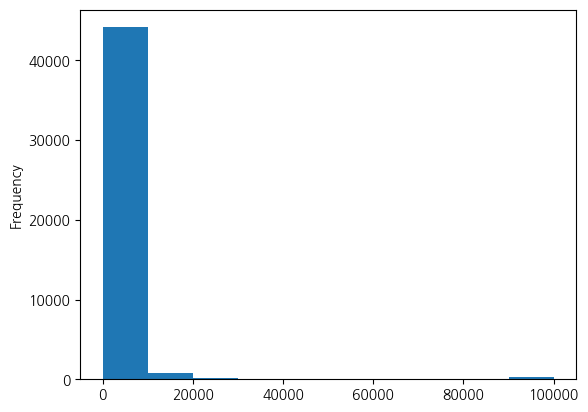

In [29]:
# 사분위수가 모두 0이 나온다
data['capital-gain'].plot(kind='hist')

### 이상값이 없음

# EDA

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  class           45222 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 4.8+ MB


In [112]:
obj_cols = data.select_dtypes(include='object')
num_cols = data.select_dtypes(exclude='object')

In [113]:
# 40% 이상인 경우는 영향을 준다고 생각하고 고려

important_cols = []
for col in obj_cols:
    print('='*30, col, '='*30)
    print(f"{col}의 unique 값 : {obj_cols[col].nunique()}")
    print()
    
    print(obj_cols[col].value_counts())
    print()
    
    print(data[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False))
    ratio_result = data[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False)
    important_cols.append(ratio_result[ratio_result['class'] > 0.4].index)
    print()

============================== workclass ==============================
workclass의 unique 값 : 7

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64

                     class
workclass                 
Self-emp-inc      0.554070
Federal-gov       0.390469
Local-gov         0.295161
Self-emp-not-inc  0.278978
State-gov         0.267215
Private           0.217702
Without-pay       0.095238

============================== education ==============================
education의 unique 값 : 16

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Pr

In [114]:
ratio_result = data[['education', 'class']].groupby('education').mean().sort_values(by='class', ascending=False)
ratio_result[ratio_result['class'] > 0.4].index

Index([' Prof-school', ' Doctorate', ' Masters', ' Bachelors'], dtype='object', name='education')

In [115]:
important_cols

[Index([' Self-emp-inc'], dtype='object', name='workclass'),
 Index([' Prof-school', ' Doctorate', ' Masters', ' Bachelors'], dtype='object', name='education'),
 Index([' Married-civ-spouse', ' Married-AF-spouse'], dtype='object', name='marital-status'),
 Index([' Exec-managerial', ' Prof-specialty'], dtype='object', name='occupation'),
 Index([' Wife', ' Husband'], dtype='object', name='relationship'),
 Index([], dtype='object', name='race'),
 Index([], dtype='object', name='sex'),
 Index([' Taiwan', ' France', ' India'], dtype='object', name='native-country')]

In [116]:
final_cols = []
for col in important_cols:
    # 중요 컬럼이 1개 이상인 경우 확인
    if len(col) > 0:
        print(col.name, len(col))
        final_cols.append(col.name)
final_cols

workclass 1
education 4
marital-status 2
occupation 2
relationship 2
native-country 3


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'native-country']

# 수치형 변수들 EDA

In [117]:
num_cols.iloc[:, :-1]

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
45217,27,12,0,0,38
45218,40,9,0,0,40
45219,58,9,0,0,40
45220,22,9,0,0,20


============================== age ==============================
age의 기초 통계값 : count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64



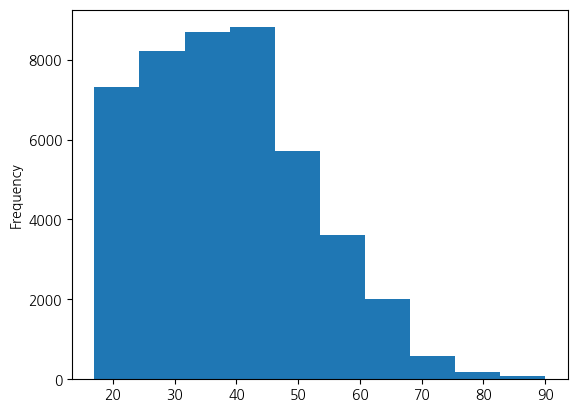


        class
age          
50   0.436671
53   0.404935
51   0.404790
54   0.404110
46   0.403955
..        ...
18   0.000000
82   0.000000
86   0.000000
87   0.000000
89   0.000000

[74 rows x 1 columns]

============================== education-num ==============================
education-num의 기초 통계값 : count    45222.000000
mean        10.118460
std          2.552881
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64



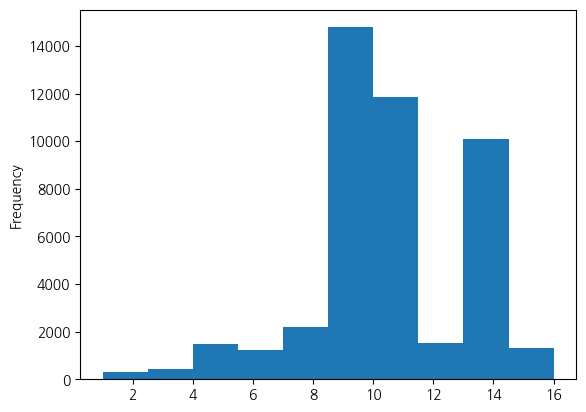


                  class
education-num          
15             0.754140
16             0.733456
14             0.554097
13             0.419815
12             0.264101
11             0.257274
10             0.201030
9              0.163431
8              0.074523
6              0.067048
4              0.066829
5              0.056213
7              0.054972
3              0.048998
2              0.036036
1              0.013889

============================== capital-gain ==============================
capital-gain의 기초 통계값 : count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64



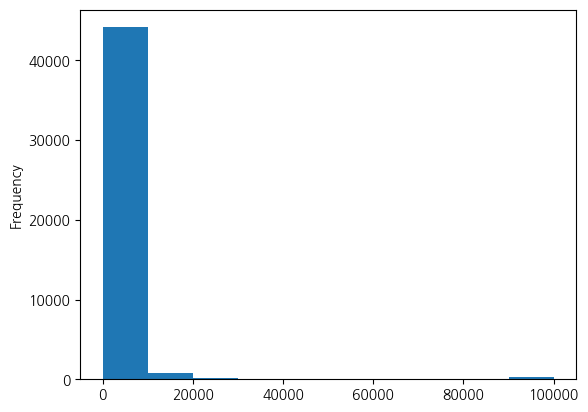


              class
capital-gain       
7298            1.0
10605           1.0
15831           1.0
15024           1.0
15020           1.0
...             ...
7443            0.0
6849            0.0
22040           0.0
34095           0.0
41310           0.0

[121 rows x 1 columns]

============================== capital-loss ==============================
capital-loss의 기초 통계값 : count    45222.000000
mean        88.595418
std        404.956092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64



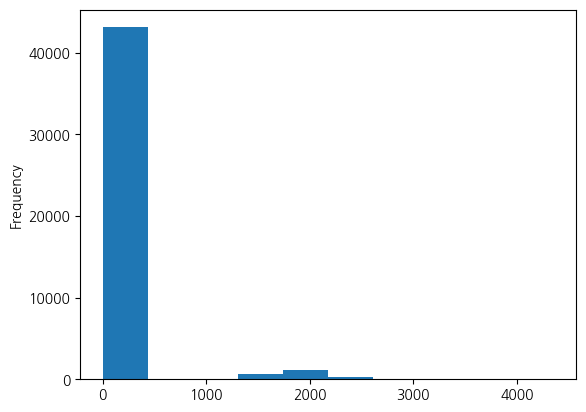


              class
capital-loss       
1564            1.0
2174            1.0
2201            1.0
2231            1.0
2246            1.0
...             ...
2754            0.0
3175            0.0
3770            0.0
3900            0.0
4356            0.0

[97 rows x 1 columns]

============================== hours-per-week ==============================
hours-per-week의 기초 통계값 : count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64



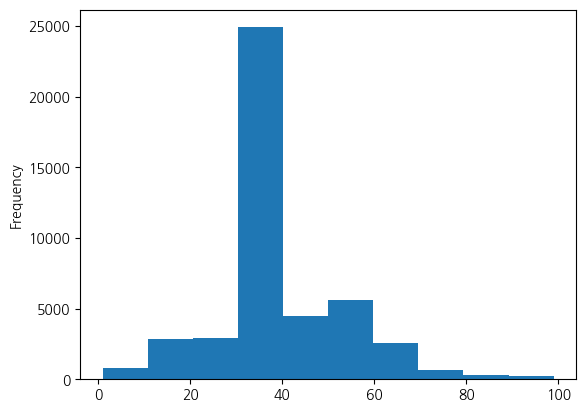


                   class
hours-per-week          
69              1.000000
61              0.750000
76              0.750000
74              0.666667
89              0.666667
...                  ...
82              0.000000
87              0.000000
88              0.000000
94              0.000000
91              0.000000

[96 rows x 1 columns]



In [118]:
# 40% 이상인 경우는 영향을 준다고 생각하고 고려

for col in num_cols.iloc[:, :-1]:
    print('='*30, col, '='*30)
    print(f"{col}의 기초 통계값 : {num_cols[col].describe()}")
    print()
    
    num_cols[col].plot(kind='hist')
    plt.show()
    print()
    
    print(data[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False))
    ratio_result = data[[col, 'class']].groupby(col).mean().sort_values(by='class', ascending=False)
    important_cols.append(ratio_result[ratio_result['class'] > 0.4].index)
    print()

In [119]:
important_cols

[Index([' Self-emp-inc'], dtype='object', name='workclass'),
 Index([' Prof-school', ' Doctorate', ' Masters', ' Bachelors'], dtype='object', name='education'),
 Index([' Married-civ-spouse', ' Married-AF-spouse'], dtype='object', name='marital-status'),
 Index([' Exec-managerial', ' Prof-specialty'], dtype='object', name='occupation'),
 Index([' Wife', ' Husband'], dtype='object', name='relationship'),
 Index([], dtype='object', name='race'),
 Index([], dtype='object', name='sex'),
 Index([' Taiwan', ' France', ' India'], dtype='object', name='native-country'),
 Index([50, 53, 51, 54, 46, 47], dtype='int64', name='age'),
 Index([15, 16, 14, 13], dtype='int64', name='education-num'),
 Index([ 7298, 10605, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 20051,
        25124, 25236, 27828, 99999, 18481,  8614,  9386,  4687,  4787,  5178,
         4934,  6418,  6514,  6097,  5556,  9562, 10520,  7262,  7688,  7430,
         3103,  4386,  7896],
       dtype='int64', name='capital-gain'),

In [120]:
final_cols = []
for col in important_cols:
    # 중요 컬럼이 1개 이상인 경우 확인
    if len(col) > 0:
        print(col.name, len(col))
        final_cols.append(col.name)
final_cols

workclass 1
education 4
marital-status 2
occupation 2
relationship 2
native-country 3
age 6
education-num 4
capital-gain 33
capital-loss 26
hours-per-week 16


['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'native-country',
 'age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [121]:
# 얼마나 오래 공부했는지 나타내는 education_num 과 같은 컬럼이라는 것을 확인 가능
data['education'].value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

In [122]:
data['education-num'].value_counts()

education-num
9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: count, dtype: int64

In [123]:
data_set1 = data[final_cols]

data_set1 = data_set1.drop('education', axis=1)
data_set1

,workclass,marital-status,occupation,relationship,native-country,age,education-num,capital-gain,capital-loss,hours-per-week
0,Private,Never-married,Machine-op-inspct,Own-child,United-States,25,7,0,0,40
1,Private,Married-civ-spouse,Farming-fishing,Husband,United-States,38,9,0,0,50
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,United-States,28,12,0,0,40
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,United-States,44,10,7688,0,40
4,Private,Never-married,Other-service,Not-in-family,United-States,34,6,0,0,30
...,...,...,...,...,...,...,...,...,...,...
45217,Private,Married-civ-spouse,Tech-support,Wife,United-States,27,12,0,0,38
45218,Private,Married-civ-spouse,Machine-op-inspct,Husband,United-States,40,9,0,0,40
45219,Private,Widowed,Adm-clerical,Unmarried,United-States,58,9,0,0,40
45220,Private,Never-married,Adm-clerical,Own-child,United-States,22,9,0,0,20


In [124]:
X = pd.get_dummies(data_set1, drop_first=True)
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [125]:
y = data['class']
y

0        0
1        0
2        1
3        1
4        0
        ..
45217    0
45218    1
45219    0
45220    0
45221    1
Name: class, Length: 45222, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=10)

In [128]:
# 1인 경우는 많이 학습하지 못함
y_train.value_counts()

class
0    20408
1     6725
Name: count, dtype: int64

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [130]:
dtc = DecisionTreeClassifier(max_depth=9,random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8526728951296368
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     13606
           1       0.76      0.59      0.67      4483

    accuracy                           0.85     18089
   macro avg       0.82      0.77      0.79     18089
weighted avg       0.85      0.85      0.85     18089



# 모델 성능  튜닝(하이퍼파라미터 튜닝)

In [131]:
for i in range(1,10):
    dtc = DecisionTreeClassifier(random_state=10)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    
    print('='*30, f"Max_depth = {i}", '='*30)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print()

============================== Max_depth = 1 ==============================
0.819669412350047
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13606
           1       0.64      0.61      0.63      4483

    accuracy                           0.82     18089
   macro avg       0.76      0.75      0.75     18089
weighted avg       0.82      0.82      0.82     18089


============================== Max_depth = 2 ==============================
0.819669412350047
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13606
           1       0.64      0.61      0.63      4483

    accuracy                           0.82     18089
   macro avg       0.76      0.75      0.75     18089
weighted avg       0.82      0.82      0.82     18089


============================== Max_depth = 3 ==============================
0.819669412350047
              precision    recall  f1-score   support

       

# 의사결정나무 시각화

In [43]:
from sklearn.tree import plot_tree

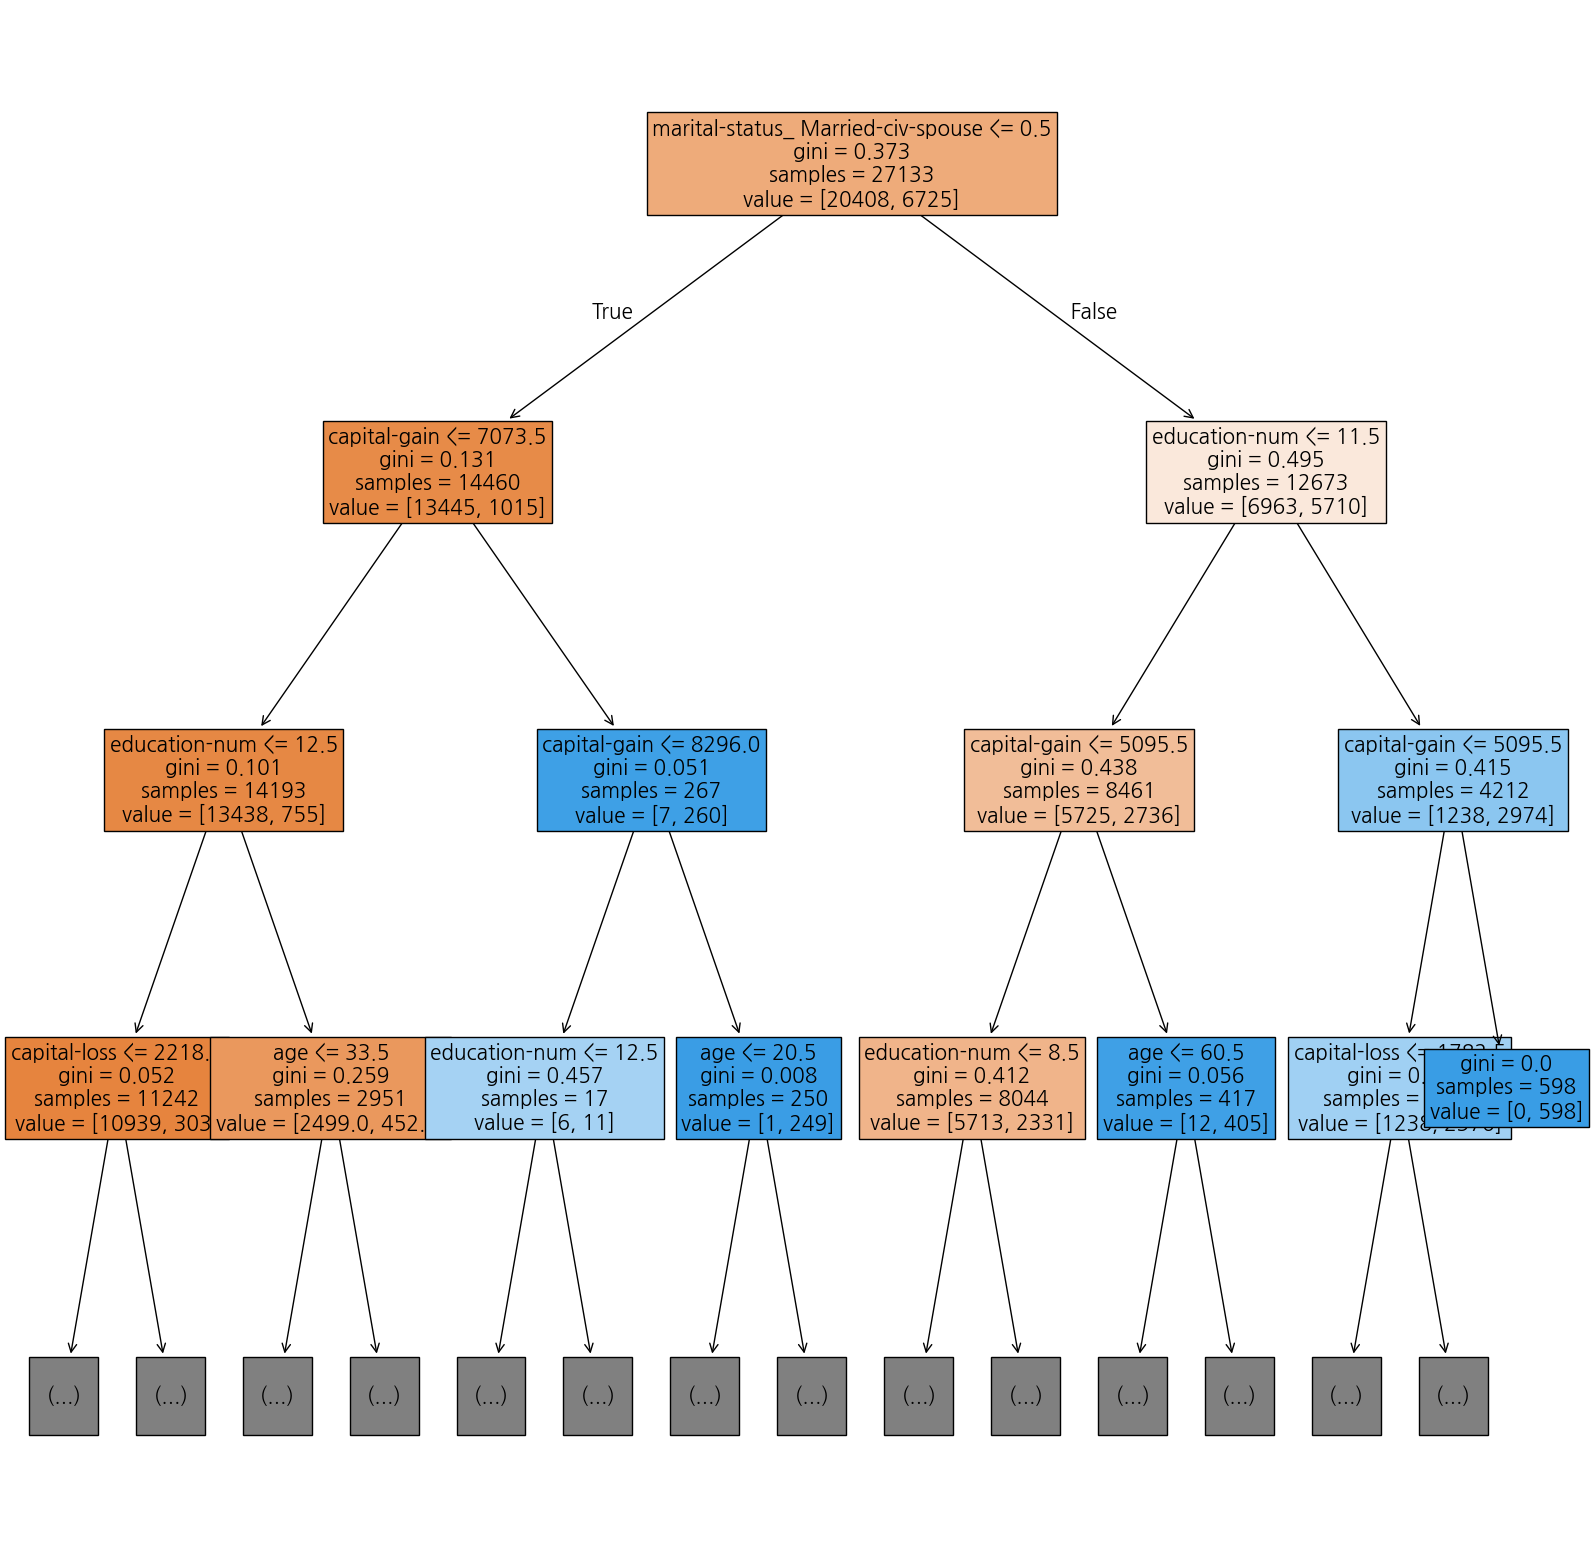

In [132]:
plt.figure(figsize=(20,20))
plot_tree(dtc, feature_names=dtc.feature_names_in_, max_depth=3,fontsize=15, filled=True)
plt.show()

# 데이터 분석 모델의 성능평가
1. accuracy(정확도/정분류율) : 1을 1이라고 맞추고 0을 0이라고 맞춘 비율
2. False Positive Rate(오분류율) : 1을 0이라고 예측하고 0을 1이라고 예측해서 잘못 예측한 것
3. precision(정밀도) : 예측한 것 중에서 실제로 맞은 것, 예측 positive 중에서 실제 positive인 비율
4. Recall(재현율/민감도) : 실제값을 실제값으로 잘 예측한 것, 실제 Positive 중 예측 Positive가 맞은 것 
5. F1-Score : precision과 recall의 조화 평균
6. Specificity(특이도) : 실제 nagative 중 예측에 성공한 비율

In [133]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13606
           1       0.64      0.61      0.63      4483

    accuracy                           0.82     18089
   macro avg       0.76      0.75      0.75     18089
weighted avg       0.82      0.82      0.82     18089



# Confusion Matrix(혼동행렬)
|               | 예측 Positive       | 예측 Nagative      |
|:-------------:|:-------------------:|:------------------:|
|**실제 Posit**   | TP(True Positive)   |FN(False Nagative)  |
|**실제 Nagative**  | FP(False Positive)  |TN(True Nagative)   |

-----

- TP : 실제 Positive, 예측 Positive(실제 연봉 5만 초과, 예측 연봉도 5만 초과)
- TN : 실제 Nagative, 예측 Nagative(실제 연봉 5만 이하, 예측 연봉도 5만 이하)
- FP(1형 오류) : 실제 Nagative, 예측 Positive(실제 연봉 5만 이하, 예측 연봉도 5만 초과)
- FN(2형 오류) : 실제 Positive, 예측 Nagative(실제 연봉 5만 초과, 예측 연봉도 5만 이하)

- 정확도(accurary_score)<br>
$TP + TN \over TP+TN+FP+FN $
- 오분류율(FPR)<br>
$FP+FN \over TP+TN+FP+FN $
- 정밀도(precision)<br>
$TP \over TP+FP $
- 재현율/민감도(Recall)<br>
$TP \over TP+FN $
- 특이도(Specificity)<br>
$TN \over FP+TN $
- F1-Score <br>
$2 \cdot {Precision \cdot Recall \over Recision + Recall} $ <br>


In [134]:
from sklearn.metrics import confusion_matrix

In [53]:
# 파이썬은 혼동행렬의 위치가 다름
# TN    FP
# FN    TP
# 위 설명과는 다르게 해당 형식으로 만들어짐
print(confusion_matrix(y_test, pred))

[[12769   837]
 [ 1828  2655]]


In [135]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13606
           1       0.64      0.61      0.63      4483

    accuracy                           0.82     18089
   macro avg       0.76      0.75      0.75     18089
weighted avg       0.82      0.82      0.82     18089



### 정확도(accurary_score)
- 클래스가 균형을 이루고, 오분류 비율이 거의 동일한 경우 사용
    - 예) 상품 리뷰를 긍정/부정으로 분류하는 서비스(긍정/부정 샘플이 비슷하고, 둘 중 하나를 틀려도 큰 손해 없는 경우)

### 오분류율(FPR)
- 전체 에러율을 보고 싶을 경우 사용
- 모델 개선 전후의 전체 오류 감소 폭을 비교하는 경우 사용
    - 예) 고객 이탈 예측 모델의 '틀린 예측 비율' 강조하는 경우

### 정밀도(precision)
- Positive라고 예측한 경우 실제 Positive의 비율이 높은지 확인하는 경우 사용
    - 예) 스팸 필터(정상 메일을 스팸으로 잘못 분류하면 고객 불만도 상승)
    - 예) 범원 판결 보조 시스템(무죄자를 유죄로 분류하는 위험 최소화)

### 재현율/민감도(Recall)
- 실제 Positive
- 특이도(Specificity)<br>
$TN \over FP+TN $
- F1-Score <br>
$2 \cdot {Precision \cdot Recall \over Recision + Recall} $ <br>

# Dataset2 : 모든 컬럼 다 넣고 분석해보기

In [136]:
len(data_set1.columns)

10

In [137]:
len(data.columns)
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [72]:
# data

In [138]:
# 모든 컬럼을 포함하여 모델 예측 진행
X2 = data.drop('class', axis=1)
X2

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
45218,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
45219,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
45220,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [139]:
y2 = data['class']
y2.head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int64

In [140]:
X2 = pd.get_dummies(X2, drop_first=True)
X2

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,12,0,0,38,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45218,40,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45219,58,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45220,22,9,0,0,20,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [141]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=0)

In [149]:
dtc2 = DecisionTreeClassifier(random_state=10)
dtc2.fit(X2_train, y2_train)
pred2 = dtc2.predict(X2_test)
print(accuracy_score(y2_test, pred2))
print(classification_report(y2_test, pred2))

0.8138647797003704
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     13541
           1       0.64      0.61      0.62      4548

    accuracy                           0.81     18089
   macro avg       0.75      0.75      0.75     18089
weighted avg       0.81      0.81      0.81     18089



In [197]:
for i in range(1, 11):
    dtc2 = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc2.fit(X2_train, y2_train)
    pred2 = dtc2.predict(X2_test)
    
    print('='*30, f"max_depth = {i}", '='*30)
    print(accuracy_score(y2_test, pred2))
    print(classification_report(y2_test, pred2))

============================== max_depth = 1 ==============================
0.7485764829454364
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13541
           1       0.00      0.00      0.00      4548

    accuracy                           0.75     18089
   macro avg       0.37      0.50      0.43     18089
weighted avg       0.56      0.75      0.64     18089



C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

============================== max_depth = 2 ==============================
0.8208303388799824
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     13541
           1       0.72      0.47      0.57      4548

    accuracy                           0.82     18089
   macro avg       0.78      0.71      0.73     18089
weighted avg       0.81      0.82      0.81     18089

============================== max_depth = 3 ==============================
0.8338216595721156
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     13541
           1       0.74      0.53      0.61      4548

    accuracy                           0.83     18089
   macro avg       0.80      0.73      0.75     18089
weighted avg       0.83      0.83      0.82     18089

============================== max_depth = 4 ==============================
0.8389629056332578
              precision    recall  f1-score   support

      

In [151]:
dtc2 = DecisionTreeClassifier(max_depth=12, random_state=10)
dtc2.fit(X2_train, y_train)
pred2 = dtc2.predict(X2_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.819669412350047
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     13606
           1       0.64      0.61      0.63      4483

    accuracy                           0.82     18089
   macro avg       0.76      0.75      0.75     18089
weighted avg       0.82      0.82      0.82     18089



# EDA를 간편하게 하는 방법
- [ydata 라이브러리](https://github.com/ydataai/ydata-profiling)

In [153]:
from ydata_profiling import ProfileReport

C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [154]:
profile = ProfileReport(data, title="Profiling Report")

In [155]:
profile.to_file("salary2_eda.html")

Export report to file: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.18it/s]


In [157]:
data2 = pd.read_csv('./data/salary2.csv')

In [158]:
profile = ProfileReport(data, title="Profiling Report")

In [159]:
profile.to_file("salary2_eda2.html")

Export report to file: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.41it/s]


## ydata의 결과를 통한 데이터 전처리

In [162]:
data2 = data2.dropna()
data2.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [171]:
# 중복행을 처리
len(data2[data2.duplicated()])

1452

In [166]:
data2 = data2.drop_duplicates()

In [168]:
data2.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [170]:
data2 = data2.drop(['education','relationship'], axis=1)
data2

,age,workclass,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,14,Married-civ-spouse,Exec-managerial,White,Male,0,0,40,United-States,>50K
48836,22,Private,10,Never-married,Protective-serv,White,Male,0,0,40,United-States,<=50K
48837,27,Private,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,United-States,<=50K
48839,58,Private,9,Widowed,Adm-clerical,White,Female,0,0,40,United-States,<=50K


In [173]:
data2 = data2.reset_index(drop=True)

In [179]:
data2 = pd.get_dummies(data2, drop_first=True)

In [184]:
X3 = data2.drop('class_ >50K', axis=1)
X3

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39235,53,14,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39236,22,10,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39237,27,12,0,0,38,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
39238,58,9,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [175]:
y3 = data2['class']

In [190]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.4, stratify=y3,random_state=10)

In [193]:
print(len(X3_train))
print(len(X3_test))
print()

print(len(y3_train))
print(len(y3_test))

23544
15696

23544
15696


In [192]:
dtc3 = DecisionTreeClassifier(random_state=10)
dtc3.fit(X3_train, y3_train)
pred3 = dtc3.predict(X3_test)

print(accuracy_score(y3_test, pred3))
print(classification_report(y3_test, pred3))

0.8024974515800204
              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87     11706
        >50K       0.61      0.61      0.61      3990

    accuracy                           0.80     15696
   macro avg       0.74      0.74      0.74     15696
weighted avg       0.80      0.80      0.80     15696



In [196]:
for i in range(1,31):
    dtc3 = DecisionTreeClassifier(max_depth=i, random_state=10)
    dtc3.fit(X3_train, y3_train)
    pred3 = dtc3.predict(X3_test)

    print('='*30, f"max_depth = {i}", '='*30)
    print(accuracy_score(y3_test, pred3))
    print(classification_report(y3_test, pred3))
    print()
    

============================== max_depth = 1 ==============================
0.7457951070336392


C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

       <=50K       0.75      1.00      0.85     11706
        >50K       0.00      0.00      0.00      3990

    accuracy                           0.75     15696
   macro avg       0.37      0.50      0.43     15696
weighted avg       0.56      0.75      0.64     15696


============================== max_depth = 2 ==============================
0.8162589194699287
              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88     11706
        >50K       0.73      0.44      0.55      3990

    accuracy                           0.82     15696
   macro avg       0.78      0.69      0.72     15696
weighted avg       0.81      0.82      0.80     15696


============================== max_depth = 3 ==============================
0.8333333333333334
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89     11706
        >50K       0.75      0.51      0.61  

============================== max_depth = 21 ==============================
0.8295744138634047
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89     11706
        >50K       0.68      0.61      0.65      3990

    accuracy                           0.83     15696
   macro avg       0.78      0.76      0.77     15696
weighted avg       0.82      0.83      0.83     15696


============================== max_depth = 22 ==============================
0.8300203873598369
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89     11706
        >50K       0.67      0.65      0.66      3990

    accuracy                           0.83     15696
   macro avg       0.78      0.77      0.77     15696
weighted avg       0.83      0.83      0.83     15696


============================== max_depth = 23 ==============================
0.8234582059123343
              precision    recall  f1-score   support

 

# 배깅(Bagging)
- 원본 학습 데이터셋에서 복원추출 방법(중복 허용 랜덤 샘플링)으로 여러 데이터셋(부트스트랩)으로 생성
    - 예) 원본 학습 데이터에 10개의 데이터 존재 > 그 중 랜덤하게 중복 가능한 5개 데이터 추출 > 5개의 데이터셋 생성
- 생성된 각 데이터셋에 독립적 모델을 학습 시키고 **평균(회귀) 또는 다수결(분류)** 로 합침
- 효과
    - 오버피팅 완화
    - 랜덤포레스트 모델 등 활용
    - 편향(Bias) 자체를 줄일 수 없음

In [199]:
from sklearn.ensemble import BaggingClassifier

In [201]:
bc = BaggingClassifier(n_estimators=10, n_jobs=10, random_state=10)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8393498811432363
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     13606
           1       0.71      0.60      0.65      4483

    accuracy                           0.84     18089
   macro avg       0.79      0.76      0.77     18089
weighted avg       0.83      0.84      0.84     18089



In [204]:
# 결정트리나무의 정확도 중 가장 잘나온 깊이 9의 결정트리 모델을 적용
# n_estimators가 늘어날수록 정확도가 증가할 수 있음(고려할 수 있는 독립적 모델 결과가 많아짐)
est = DecisionTreeClassifier(max_depth=9, random_state=10)
bc = BaggingClassifier(estimator=est, n_estimators=100, n_jobs=10, random_state=10)
bc.fit(X_train, y_train)
pred = bc.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8596384543092487
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13606
           1       0.79      0.60      0.68      4483

    accuracy                           0.86     18089
   macro avg       0.83      0.77      0.79     18089
weighted avg       0.85      0.86      0.85     18089



# 부스팅(Boosting)
- 여러 약한 학습기를 순차적으로 학습 > 이전 모델이 틀린 샘플에 가중치를 높여 다음 모델이 어려운 샘플을 집중적으로 학습시킴
- 효과
    - 편향(Bias) 감소에 효과적(점진적 오류 보정을 통한 강력한 모델 생성)
    - XGBoost, LightGBM 등 활용
    

In [205]:
from sklearn.ensemble import AdaBoostClassifier

In [215]:
abc = AdaBoostClassifier(estimator=est, n_estimators=100, learning_rate=0.5 ,random_state=10)
abc.fit(X_train, y_train)
pred = abc.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8661064735474597
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     13606
           1       0.78      0.64      0.70      4483

    accuracy                           0.87     18089
   macro avg       0.83      0.79      0.81     18089
weighted avg       0.86      0.87      0.86     18089



In [211]:
from sklearn.ensemble import GradientBoostingClassifier

In [213]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5 ,random_state=10)
gbc.fit(X_train, y_train)
pred = gbc.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8695892531372658
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     13606
           1       0.79      0.64      0.71      4483

    accuracy                           0.87     18089
   macro avg       0.84      0.79      0.81     18089
weighted avg       0.87      0.87      0.86     18089



# XGBOOST
- https://xgboost.readthedocs.io/en/stable/install.html
- pip install xgboost
- 병렬연산이 가능해 처리 속도가 매우 빨라짐
- 따로 설치 필요

In [216]:
from xgboost import XGBClassifier

In [218]:
xgb = XGBClassifier(n_estimators=100, random_state=10)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8689811487644424
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     13606
           1       0.79      0.65      0.71      4483

    accuracy                           0.87     18089
   macro avg       0.84      0.79      0.81     18089
weighted avg       0.86      0.87      0.86     18089



In [222]:
for i in range(1,20):
    xgb = XGBClassifier(max_depth = i, n_estimators=100, n_jobs=10,random_state=10)
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    
    print(i)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

1
0.8572613190336669
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     13606
           1       0.80      0.57      0.66      4483

    accuracy                           0.86     18089
   macro avg       0.83      0.76      0.79     18089
weighted avg       0.85      0.86      0.85     18089

2
0.8653878047432141
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13606
           1       0.79      0.62      0.69      4483

    accuracy                           0.87     18089
   macro avg       0.84      0.78      0.80     18089
weighted avg       0.86      0.87      0.86     18089

3
0.8687600199015977
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     13606
           1       0.80      0.63      0.70      4483

    accuracy                           0.87     18089
   macro avg       0.84      0.79      0.81     18089
weighted av

In [224]:
xgb = XGBClassifier(max_depth = 8, n_estimators=100, n_jobs=10,random_state=10)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8706396152357786
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     13606
           1       0.79      0.66      0.72      4483

    accuracy                           0.87     18089
   macro avg       0.84      0.80      0.82     18089
weighted avg       0.87      0.87      0.87     18089



# LightGBM
- https://lightgbm.readthedocs.io/en/stable/Installation-Guide.html
- xgboost보다 속도를 더 빠르게
- 비대칭 트리를 만듦

In [226]:
from lightgbm import LGBMClassifier

In [231]:
%%time
lgbm = LGBMClassifier(n_estimators=1000, n_jobs=10,random_state=10)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6725, number of negative: 20408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 27133, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247853 -> initscore=-1.110095
[LightGBM] [Info] Start training from score -1.110095
0.8635082094090332
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     13606
           1       0.76      0.65      0.70      4483

    accuracy                           0.86     18089
   macro avg       0.83      0.79      0.81     18089
weighted avg       0.86      0.86      0.86     18089

CPU times: total: 

# Catboost
- https://catboost.ai/docs/en/concepts/python-installation

In [233]:
from catboost import CatBoostClassifier

In [235]:
%%time
cbc = CatBoostClassifier(n_estimators=1000,random_state=10)
cbc.fit(X_train, y_train)
pred = cbc.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Learning rate set to 0.042173
0:	learn: 0.6536390	total: 195ms	remaining: 3m 15s
1:	learn: 0.6161668	total: 231ms	remaining: 1m 55s
2:	learn: 0.5857310	total: 280ms	remaining: 1m 33s
3:	learn: 0.5573898	total: 314ms	remaining: 1m 18s
4:	learn: 0.5306863	total: 366ms	remaining: 1m 12s
5:	learn: 0.5082347	total: 422ms	remaining: 1m 9s
6:	learn: 0.4879174	total: 496ms	remaining: 1m 10s
7:	learn: 0.4698112	total: 535ms	remaining: 1m 6s
8:	learn: 0.4547847	total: 573ms	remaining: 1m 3s
9:	learn: 0.4419169	total: 594ms	remaining: 58.8s
10:	learn: 0.4304874	total: 631ms	remaining: 56.8s
11:	learn: 0.4204120	total: 716ms	remaining: 59s
12:	learn: 0.4107632	total: 776ms	remaining: 58.9s
13:	learn: 0.4026859	total: 830ms	remaining: 58.5s
14:	learn: 0.3967674	total: 913ms	remaining: 59.9s
15:	learn: 0.3901975	total: 965ms	remaining: 59.3s
16:	learn: 0.3843148	total: 1s	remaining: 58.1s
17:	learn: 0.3784273	total: 1.04s	remaining: 56.9s
18:	learn: 0.3731993	total: 1.09s	remaining: 56.2s
19:	learn:

162:	learn: 0.2937683	total: 10.9s	remaining: 56.2s
163:	learn: 0.2934116	total: 11s	remaining: 56.2s
164:	learn: 0.2931589	total: 11.1s	remaining: 56s
165:	learn: 0.2931017	total: 11.2s	remaining: 56s
166:	learn: 0.2930010	total: 11.2s	remaining: 56s
167:	learn: 0.2929377	total: 11.3s	remaining: 56s
168:	learn: 0.2928718	total: 11.4s	remaining: 55.9s
169:	learn: 0.2927865	total: 11.4s	remaining: 55.8s
170:	learn: 0.2926790	total: 11.5s	remaining: 55.7s
171:	learn: 0.2925732	total: 11.6s	remaining: 55.7s
172:	learn: 0.2924239	total: 11.6s	remaining: 55.5s
173:	learn: 0.2923308	total: 11.7s	remaining: 55.4s
174:	learn: 0.2922354	total: 11.8s	remaining: 55.5s
175:	learn: 0.2921539	total: 11.8s	remaining: 55.4s
176:	learn: 0.2920843	total: 11.9s	remaining: 55.3s
177:	learn: 0.2920267	total: 11.9s	remaining: 55.1s
178:	learn: 0.2919792	total: 12s	remaining: 55s
179:	learn: 0.2918657	total: 12s	remaining: 54.8s
180:	learn: 0.2917583	total: 12.1s	remaining: 54.7s
181:	learn: 0.2916325	total:

321:	learn: 0.2794943	total: 20.8s	remaining: 43.9s
322:	learn: 0.2794442	total: 20.9s	remaining: 43.8s
323:	learn: 0.2793962	total: 21s	remaining: 43.7s
324:	learn: 0.2793134	total: 21s	remaining: 43.6s
325:	learn: 0.2792581	total: 21.1s	remaining: 43.5s
326:	learn: 0.2791496	total: 21.1s	remaining: 43.5s
327:	learn: 0.2790936	total: 21.2s	remaining: 43.4s
328:	learn: 0.2790504	total: 21.3s	remaining: 43.3s
329:	learn: 0.2789970	total: 21.3s	remaining: 43.3s
330:	learn: 0.2789445	total: 21.4s	remaining: 43.3s
331:	learn: 0.2788819	total: 21.5s	remaining: 43.2s
332:	learn: 0.2788150	total: 21.5s	remaining: 43.1s
333:	learn: 0.2787397	total: 21.6s	remaining: 43.1s
334:	learn: 0.2786986	total: 21.7s	remaining: 43s
335:	learn: 0.2786434	total: 21.7s	remaining: 42.9s
336:	learn: 0.2785921	total: 21.8s	remaining: 42.9s
337:	learn: 0.2785427	total: 21.9s	remaining: 42.8s
338:	learn: 0.2785126	total: 21.9s	remaining: 42.8s
339:	learn: 0.2784524	total: 22s	remaining: 42.7s
340:	learn: 0.278373

480:	learn: 0.2699582	total: 30.6s	remaining: 33.1s
481:	learn: 0.2699269	total: 30.7s	remaining: 33s
482:	learn: 0.2698508	total: 30.7s	remaining: 32.9s
483:	learn: 0.2698280	total: 30.7s	remaining: 32.8s
484:	learn: 0.2697987	total: 30.8s	remaining: 32.7s
485:	learn: 0.2697639	total: 30.8s	remaining: 32.6s
486:	learn: 0.2695693	total: 30.8s	remaining: 32.5s
487:	learn: 0.2695473	total: 30.9s	remaining: 32.4s
488:	learn: 0.2694998	total: 30.9s	remaining: 32.3s
489:	learn: 0.2694701	total: 31s	remaining: 32.2s
490:	learn: 0.2694069	total: 31s	remaining: 32.1s
491:	learn: 0.2693877	total: 31s	remaining: 32s
492:	learn: 0.2693411	total: 31s	remaining: 31.9s
493:	learn: 0.2693107	total: 31.1s	remaining: 31.8s
494:	learn: 0.2692641	total: 31.1s	remaining: 31.7s
495:	learn: 0.2692330	total: 31.2s	remaining: 31.7s
496:	learn: 0.2692155	total: 31.2s	remaining: 31.6s
497:	learn: 0.2691816	total: 31.2s	remaining: 31.5s
498:	learn: 0.2691331	total: 31.3s	remaining: 31.4s
499:	learn: 0.2690669	to

641:	learn: 0.2639158	total: 40.7s	remaining: 22.7s
642:	learn: 0.2638850	total: 40.8s	remaining: 22.6s
643:	learn: 0.2638671	total: 41s	remaining: 22.7s
644:	learn: 0.2638455	total: 41.1s	remaining: 22.6s
645:	learn: 0.2637865	total: 41.1s	remaining: 22.5s
646:	learn: 0.2637691	total: 41.2s	remaining: 22.5s
647:	learn: 0.2637394	total: 41.2s	remaining: 22.4s
648:	learn: 0.2637096	total: 41.3s	remaining: 22.3s
649:	learn: 0.2636960	total: 41.3s	remaining: 22.3s
650:	learn: 0.2636743	total: 41.4s	remaining: 22.2s
651:	learn: 0.2636162	total: 41.4s	remaining: 22.1s
652:	learn: 0.2635855	total: 41.5s	remaining: 22.1s
653:	learn: 0.2635752	total: 41.5s	remaining: 22s
654:	learn: 0.2635553	total: 41.6s	remaining: 21.9s
655:	learn: 0.2635323	total: 41.6s	remaining: 21.8s
656:	learn: 0.2634925	total: 41.7s	remaining: 21.8s
657:	learn: 0.2634550	total: 41.7s	remaining: 21.7s
658:	learn: 0.2634137	total: 41.8s	remaining: 21.6s
659:	learn: 0.2633774	total: 41.9s	remaining: 21.6s
660:	learn: 0.26

800:	learn: 0.2588294	total: 50.5s	remaining: 12.5s
801:	learn: 0.2588000	total: 50.5s	remaining: 12.5s
802:	learn: 0.2587624	total: 50.5s	remaining: 12.4s
803:	learn: 0.2587212	total: 50.6s	remaining: 12.3s
804:	learn: 0.2586658	total: 50.6s	remaining: 12.3s
805:	learn: 0.2586161	total: 50.6s	remaining: 12.2s
806:	learn: 0.2585952	total: 50.7s	remaining: 12.1s
807:	learn: 0.2585611	total: 50.7s	remaining: 12s
808:	learn: 0.2585189	total: 50.7s	remaining: 12s
809:	learn: 0.2584833	total: 50.8s	remaining: 11.9s
810:	learn: 0.2584646	total: 50.8s	remaining: 11.8s
811:	learn: 0.2584312	total: 50.8s	remaining: 11.8s
812:	learn: 0.2584191	total: 50.9s	remaining: 11.7s
813:	learn: 0.2583935	total: 50.9s	remaining: 11.6s
814:	learn: 0.2583664	total: 51s	remaining: 11.6s
815:	learn: 0.2583572	total: 51s	remaining: 11.5s
816:	learn: 0.2583235	total: 51.1s	remaining: 11.4s
817:	learn: 0.2582756	total: 51.2s	remaining: 11.4s
818:	learn: 0.2582464	total: 51.3s	remaining: 11.3s
819:	learn: 0.258213

959:	learn: 0.2540632	total: 59.6s	remaining: 2.48s
960:	learn: 0.2540333	total: 59.7s	remaining: 2.42s
961:	learn: 0.2540131	total: 59.7s	remaining: 2.36s
962:	learn: 0.2539792	total: 59.7s	remaining: 2.29s
963:	learn: 0.2539483	total: 59.8s	remaining: 2.23s
964:	learn: 0.2539301	total: 59.8s	remaining: 2.17s
965:	learn: 0.2538966	total: 59.8s	remaining: 2.11s
966:	learn: 0.2538716	total: 59.9s	remaining: 2.04s
967:	learn: 0.2538245	total: 60s	remaining: 1.98s
968:	learn: 0.2538020	total: 1m	remaining: 1.92s
969:	learn: 0.2537793	total: 1m	remaining: 1.86s
970:	learn: 0.2537479	total: 1m	remaining: 1.8s
971:	learn: 0.2537065	total: 1m	remaining: 1.73s
972:	learn: 0.2536666	total: 1m	remaining: 1.67s
973:	learn: 0.2536360	total: 1m	remaining: 1.61s
974:	learn: 0.2536249	total: 1m	remaining: 1.55s
975:	learn: 0.2535832	total: 1m	remaining: 1.49s
976:	learn: 0.2535713	total: 1m	remaining: 1.43s
977:	learn: 0.2535516	total: 1m	remaining: 1.36s
978:	learn: 0.2535302	total: 1m	remaining: 1.

# 랜덤 배깅(RandomForest)
- 배깅 기반으로 다수의 결정 트리를 독립적으로 학습시키고 각 트리의 예측을 **평균(회귀) 또는 다수결(분류)** 로 합침
- 랜덤 포레스트 과정
    1. 원본 데이터에서 복원추출 방법으로 통해 랜덤 샘플을 n_estimators 개만큼 생성
    2. 트리별 학습 : 각 샘플마다 feature subset(max_feature)을 랜덤 선택 > 선택된 특성만으로 완전 성장/지정 깊이만큼 트리 생성
    3. 예측 결합 : 분류(각 트리 예측 결과 중 다수결로 최종 레이블 선택) / 회귀(트리 예측 값의 평균)
- 효과
    - 분산 감소 : 오버피팅 완화
    - 특성 중요도(feature importance) 제공 : 모델 성능에 어떤 컬럼이 기여했는지 확인 가능
    - 병렬 처리 가능 : 독립적 학습으로 분산 환경에서 학습 속도 향상

In [236]:
from sklearn.ensemble import RandomForestClassifier

In [237]:
%%time
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=10, random_state=10)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8490242688926972
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     13606
           1       0.73      0.63      0.67      4483

    accuracy                           0.85     18089
   macro avg       0.80      0.77      0.79     18089
weighted avg       0.84      0.85      0.85     18089

CPU times: total: 2min 45s
Wall time: 39.4 s


In [238]:
for i in range(1,20):
    rfc = RandomForestClassifier(max_depth = i, n_estimators=100, n_jobs=10,random_state=10)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    
    print(i)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

1
0.7521698269666648
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13606
           1       0.00      0.00      0.00      4483

    accuracy                           0.75     18089
   macro avg       0.38      0.50      0.43     18089
weighted avg       0.57      0.75      0.65     18089



C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

2
0.7539388578694234
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     13606
           1       1.00      0.01      0.01      4483

    accuracy                           0.75     18089
   macro avg       0.88      0.50      0.44     18089
weighted avg       0.81      0.75      0.65     18089

3
0.7787605727237548
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     13606
           1       0.99      0.11      0.19      4483

    accuracy                           0.78     18089
   macro avg       0.88      0.55      0.53     18089
weighted avg       0.83      0.78      0.70     18089

4
0.802200232185306
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     13606
           1       0.94      0.21      0.35      4483

    accuracy                           0.80     18089
   macro avg       0.87      0.61      0.62     18089
weighted avg